In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

##**Microsoft Stock Price prediction**

In [ ]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2023,243.080002,245.750000,237.399994,239.580002,237.035995,25740000
1,1/4/2023,232.279999,232.869995,225.960007,229.100006,226.667297,50623400
2,1/5/2023,227.199997,227.550003,221.759995,222.309998,219.949387,39585600
3,1/6/2023,223.000000,225.759995,219.350006,224.929993,222.541550,43613600
4,1/9/2023,226.449997,231.240005,226.410004,227.119995,224.708298,27369800
...,...,...,...,...,...,...,...
323,4/17/2024,417.250000,418.880005,410.329987,411.839996,411.839996,15855500
324,4/18/2024,410.630005,411.890015,403.950012,404.269989,404.269989,21029900
325,4/19/2024,404.029999,405.480011,397.769989,399.119995,399.119995,30276500
326,4/22/2024,400.079987,402.850006,395.750000,400.959991,400.959991,20286900


In [ ]:
df = df[['Date', 'Close']]

In [ ]:
import datetime

def str_to_datetime(s):
  split = s.split('/')
  month, day, year = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('03/19/1986')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [ ]:
df

,Date,Close
0,1/3/2023,239.580002
1,1/4/2023,229.100006
2,1/5/2023,222.309998
3,1/6/2023,224.929993
4,1/9/2023,227.119995
...,...,...
323,4/17/2024,411.839996
324,4/18/2024,404.269989
325,4/19/2024,399.119995
326,4/22/2024,400.959991


In [ ]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-107-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2023-01-03
1     2023-01-04
2     2023-01-05
3     2023-01-06
4     2023-01-09
         ...    
323   2024-04-17
324   2024-04-18
325   2024-04-19
326   2024-04-22
327   2024-04-23
Name: Date, Length: 328, dtype: datetime64[ns]

In [ ]:
df.index = df.pop('Date')
df

,Close
Date,
2023-01-03,239.580002
2023-01-04,229.100006
2023-01-05,222.309998
2023-01-06,224.929993
2023-01-09,227.119995
...,...
2024-04-17,411.839996
2024-04-18,404.269989
2024-04-19,399.119995


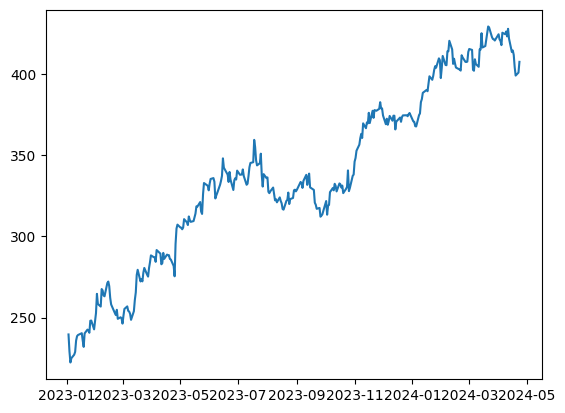

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [ ]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '01/09/2023',
                                '01/08/2024',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-01-09,229.100006,222.309998,224.929993,227.119995
1,2023-01-10,222.309998,224.929993,227.119995,228.850006
2,2023-01-11,224.929993,227.119995,228.850006,235.770004
3,2023-01-12,227.119995,228.850006,235.770004,238.509995
4,2023-01-13,228.850006,235.770004,238.509995,239.229996
...,...,...,...,...,...
246,2024-01-02,374.070007,375.279999,376.040009,370.869995
247,2024-01-03,375.279999,376.040009,370.869995,370.600006
248,2024-01-04,376.040009,370.869995,370.600006,367.940002
249,2024-01-05,370.869995,370.600006,367.940002,367.750000


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((251,), (251, 3, 1), (251,))

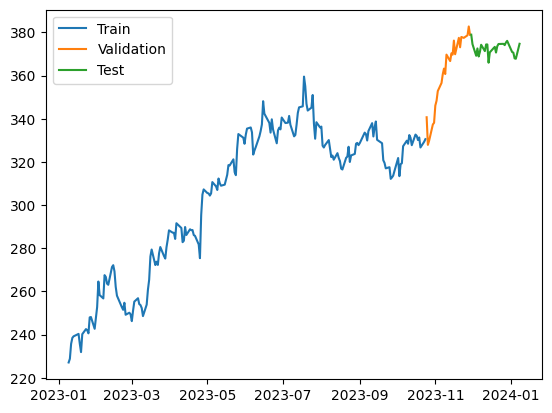

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model1 = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model1.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 94ms/step - loss: 92878.3203 - mean_absolute_error: 302.8521 - val_loss: 129961.6875 - val_mean_absolute_error: 360.1307
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 92482.5234 - mean_absolute_error: 302.1985 - val_loss: 129443.6562 - val_mean_absolute_error: 359.4107
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 92056.5469 - mean_absolute_error: 301.4907 - val_loss: 128926.8203 - val_mean_absolute_error: 358.6908
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 91527.0469 - mean_absolute_error: 300.6076 - val_loss: 128069.0625 - val_mean_absolute_error: 357.4933
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 90753.7734 - mean_absolute_error: 299.3243 - val_loss: 127084.6328 - val_mean_absolute_error: 356.1136
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 89836.9062 - mean_absolute_error: 297.7836 - val_loss: 125

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 20065 (78.38 KB)
Trainable params: 20065 (78.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


7/7 [==============================] - 0s 3ms/step


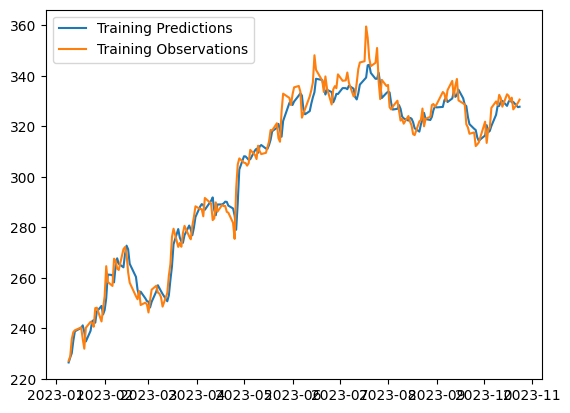

In [ ]:
train_predictions = model1.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 20ms/step


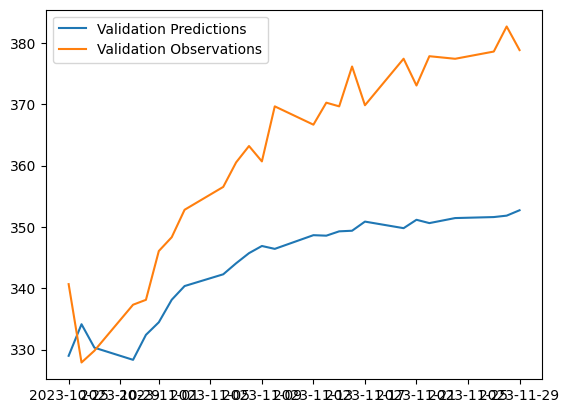

In [ ]:
val_predictions = model1.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 21ms/step


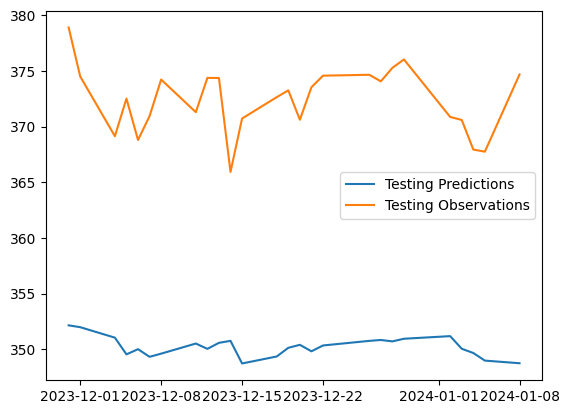

In [ ]:
test_predictions = model1.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

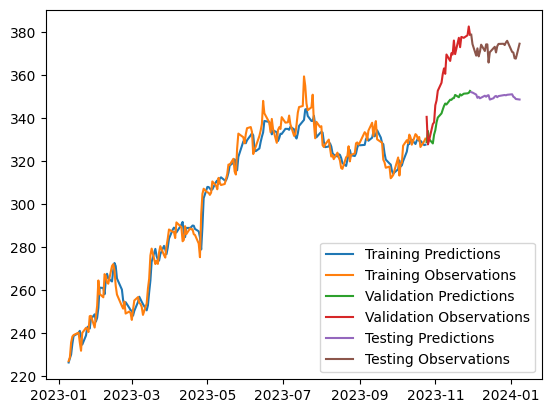

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [ ]:
mean_squared_error_MSFT = np.sum((y_test-test_predictions)**2)
print(np.sqrt(mean_squared_error_MSFT))

mean_squared_error_MSFT = np.sum((y_val-val_predictions)**2)
print(np.sqrt(mean_squared_error_MSFT))


113.881226
97.502556


In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model1.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 26ms/step


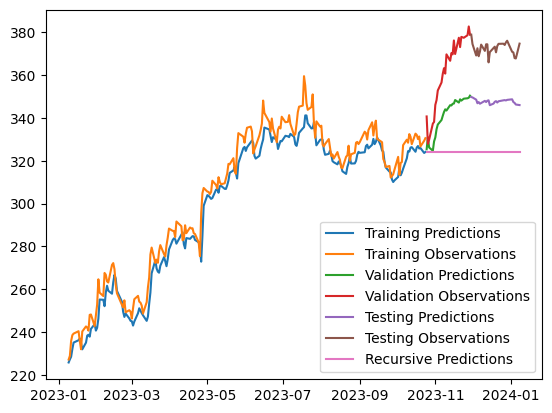

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

##**Look back of 64 days + MinMaxScaling**

In [ ]:
'''
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

def DatasetProcessing(df, look_back):
  #df['Date'] = df['Date'].apply(str_to_datetime)

  close_prices = df['Close'].values
  close_prices = close_prices.reshape(-1, 1)
  scaled_data = scaler.fit_transform(close_prices)
  X, y = create_dataset(scaled_data, look_back)

  return df['Date'], X, y


look_back = 3  # Use the past 60 days to predict the next day

dates, X, y = DatasetProcessing(df, look_back)
'''
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
def dataset_Preprocessing(df):
  close_prices = df['Close'].values
  close_prices = close_prices.reshape(-1, 1)
  scaled_data = scaler.fit_transform(close_prices)
  return scaled_data

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 60  # Use the past 60 days to predict the next day
scaled_data = dataset_Preprocessing(df)
X, y = create_dataset(scaled_data, look_back)




In [ ]:
print(pd.DataFrame(y, columns=['Close']))

        Close
0    0.298174
1    0.318700
2    0.313532
3    0.313291
4    0.299575
..        ...
262  0.928571
263  0.915339
264  0.878779
265  0.853907
266  0.862793

[267 rows x 1 columns]


In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

'''
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])
'''


"\nplt.plot(dates_train, y_train)\nplt.plot(dates_val, y_val)\nplt.plot(dates_test, y_test)\n\nplt.legend(['Train', 'Validation', 'Test'])\n"

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
200/200 - 2s - loss: 0.0126 - mean_squared_error: 0.0126 - 2s/epoch - 10ms/step
Epoch 2/100
200/200 - 0s - loss: 0.0036 - mean_squared_error: 0.0036 - 364ms/epoch - 2ms/step
Epoch 3/100
200/200 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - 376ms/epoch - 2ms/step
Epoch 4/100
200/200 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - 379ms/epoch - 2ms/step
Epoch 5/100
200/200 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - 382ms/epoch - 2ms/step
Epoch 6/100
200/200 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - 387ms/epoch - 2ms/step
Epoch 7/100
200/200 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - 364ms/epoch - 2ms/step
Epoch 8/100
200/200 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - 361ms/epoch - 2ms/step
Epoch 9/100
200/200 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - 402ms/epoch - 2ms/step
Epoch 10/100
200/200 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - 379ms/epoch - 2ms/step
Epoch 11/100
200/200 - 0s - loss: 0.0018 - mean_squared_error

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                22200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 22251 (86.92 KB)
Trainable params: 22251 (86.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2/2 [==============================] - 0s 5ms/step


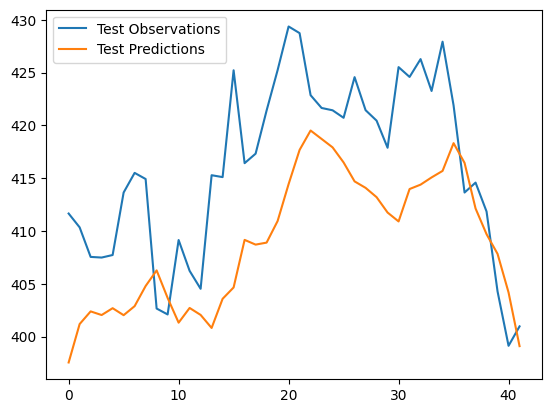

In [ ]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot( y_test[:50])
plt.plot(testPredict[:50])
plt.legend(['Test Observations', 'Test Predictions'])


In [ ]:
mean_squared_error_MSFT = np.sum((y_test-testPredict)**2)
print(np.sqrt(mean_squared_error_MSFT))

59.210369038822826


1/1 [==============================] - 0s 20ms/step


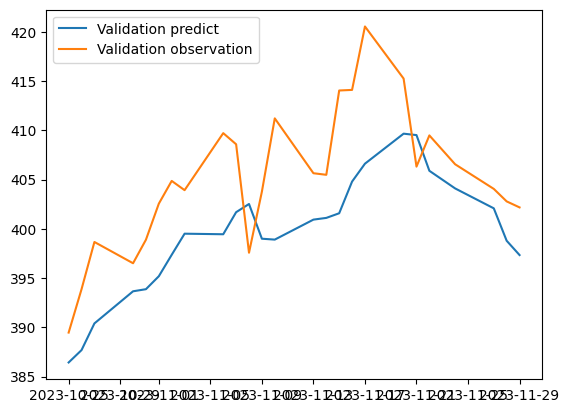

In [ ]:
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
val_predict = model.predict(X_val)

val_predict = scaler.inverse_transform(val_predict)
y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

plt.plot(dates_val, val_predict)
plt.plot(dates_val, y_val)
plt.legend(['Validation predict', 'Validation observation'])

In [ ]:
mean_squared_error_MSFT = np.sum((y_val-val_predict)**2)
print(np.sqrt(mean_squared_error_MSFT))

34.816630527315176


##**Apple stock price prediction**

In [ ]:
df_AAPL = pd.read_csv('AAPL.csv')

df_AAPL['Date'] = df_AAPL['Date'].apply(str_to_datetime)
#df_AAPL.index = df_AAPL.pop('Date')

look_back = 60  # Use the past 60 days to predict the next day
scaled_data = dataset_Preprocessing(df_AAPL)
X, y = create_dataset(scaled_data, look_back)

In [ ]:
dates = df_AAPL['Date']

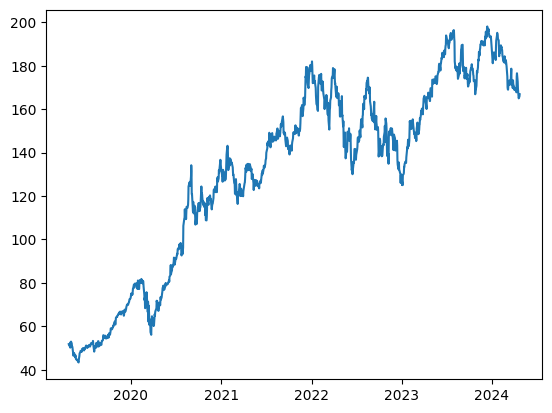

In [ ]:
plt.plot(df_AAPL['Date'], df_AAPL['Close'])

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

In [ ]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1007/1007 - 2s - loss: 4.5400e-04 - mean_squared_error: 4.5400e-04 - 2s/epoch - 2ms/step
Epoch 2/100
1007/1007 - 3s - loss: 4.6216e-04 - mean_squared_error: 4.6216e-04 - 3s/epoch - 3ms/step
Epoch 3/100
1007/1007 - 2s - loss: 4.3659e-04 - mean_squared_error: 4.3659e-04 - 2s/epoch - 2ms/step
Epoch 4/100
1007/1007 - 2s - loss: 4.7019e-04 - mean_squared_error: 4.7019e-04 - 2s/epoch - 2ms/step
Epoch 5/100
1007/1007 - 2s - loss: 4.6137e-04 - mean_squared_error: 4.6137e-04 - 2s/epoch - 2ms/step
Epoch 6/100
1007/1007 - 2s - loss: 4.7764e-04 - mean_squared_error: 4.7764e-04 - 2s/epoch - 2ms/step
Epoch 7/100
1007/1007 - 2s - loss: 4.2215e-04 - mean_squared_error: 4.2215e-04 - 2s/epoch - 2ms/step
Epoch 8/100
1007/1007 - 3s - loss: 4.2445e-04 - mean_squared_error: 4.2445e-04 - 3s/epoch - 3ms/step
Epoch 9/100
1007/1007 - 2s - loss: 4.7236e-04 - mean_squared_error: 4.7236e-04 - 2s/epoch - 2ms/step
Epoch 10/100
1007/1007 - 2s - loss: 4.3325e-04 - mean_squared_error: 4.3325e-04 - 2s/epoch 

3/3 [==============================] - 0s 4ms/step


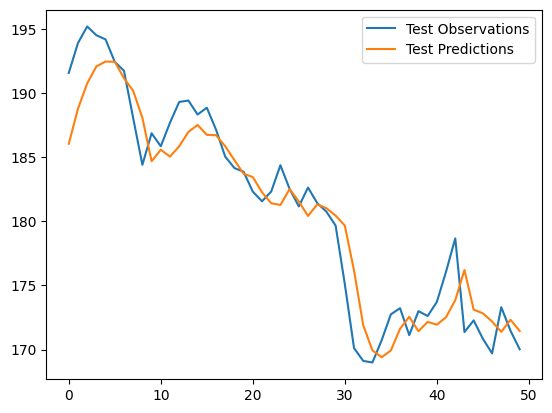

In [ ]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot( y_test[:50])
plt.plot(testPredict[:50])
plt.legend(['Test Observations', 'Test Predictions'])


In [ ]:
mean_squared_error_MSFT = np.sum((y_test-testPredict)**2)
print(np.sqrt(mean_squared_error_MSFT))

20.766660964639264


4/4 [==============================] - 0s 3ms/step


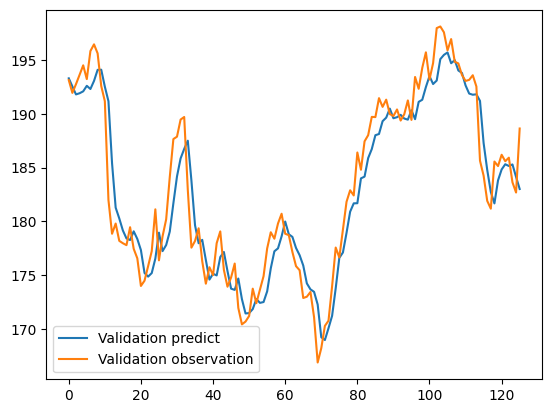

In [ ]:
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
val_predict = model.predict(X_val)

val_predict = scaler.inverse_transform(val_predict)
y_val = scaler.inverse_transform(y_val.reshape(-1, 1))

plt.plot(val_predict)
plt.plot(y_val)
plt.legend(['Validation predict', 'Validation observation'])

In [ ]:
mean_squared_error_MSFT = np.sum((y_val-val_predict)**2)
print(np.sqrt(mean_squared_error_MSFT))

29.289130267606218
